1. Problem Statement
Sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media. Suppose that in our role as Data Scientist we are asked to suggest.

We want to find a function that given input budgets for TV, radio and newspaper predicts the output sales.

Which media contribute to sales?

Visualize the relationship between the features and the response using scatter plots


2. Data Loading and Description
The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, tv and newspaper.




TV - Spend on TV Advertisements
Radio - Spend on radio Advertisements
Newspaper - Spend on newspaper Advertisements
Sales - Sales revenue generated

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("data_with_predictions.csv",index_col=0)

In [3]:
data

,TV,radio,newspaper,sales,Area_suburban,Area_urban,predictions,error
1,230.1,37.8,69.2,22.1,0,0,20.480693,1.619307
2,44.5,39.3,45.1,10.4,0,1,12.539271,-2.139271
3,17.2,45.9,69.3,9.3,0,0,12.248978,-2.948978
4,151.5,41.3,58.5,18.5,0,1,17.801707,0.698293
5,180.8,10.8,58.4,12.9,1,0,13.050091,-0.150091
...,...,...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,1,0,5.232013,2.367987
197,94.2,4.9,8.1,9.7,0,1,8.399298,1.300702
198,177.0,9.3,6.4,12.8,1,0,12.647561,0.152439
199,283.6,42.0,66.2,25.5,0,0,23.722161,1.777839


In [4]:
data.shape

(200, 8)

In [5]:
data.isnull().sum()

TV               0
radio            0
newspaper        0
sales            0
Area_suburban    0
Area_urban       0
predictions      0
error            0
dtype: int64

In [6]:
data.dtypes

TV               float64
radio            float64
newspaper        float64
sales            float64
Area_suburban      int64
Area_urban         int64
predictions      float64
error            float64
dtype: object

features:TV	radio	newspaper	
response:sales

3. Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TV             200 non-null    float64
 1   radio          200 non-null    float64
 2   newspaper      200 non-null    float64
 3   sales          200 non-null    float64
 4   Area_suburban  200 non-null    int64  
 5   Area_urban     200 non-null    int64  
 6   predictions    200 non-null    float64
 7   error          200 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 14.1 KB


In [8]:
data.describe()

,TV,radio,newspaper,sales,Area_suburban,Area_urban,predictions,error
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,147.042500,23.264000,30.554000,14.022500,0.390000,0.315000,14.022500,-1.083578e-15
std,85.854236,14.846809,21.778621,5.217457,0.488974,0.465682,4.944511,1.665431e+00
min,0.700000,0.000000,0.300000,1.600000,0.000000,0.000000,3.569116,-9.026476e+00
25%,74.375000,9.975000,12.750000,10.375000,0.000000,0.000000,10.191728,-8.598808e-01
50%,149.750000,22.900000,25.750000,12.900000,0.000000,0.000000,13.841137,2.789279e-01
75%,218.825000,36.525000,45.100000,17.400000,1.000000,1.000000,17.821683,1.176990e+00
max,296.400000,49.600000,114.000000,27.000000,1.000000,1.000000,24.988206,2.592033e+00


In [9]:
data=data.drop(["Area_suburban","Area_urban","predictions","error"],axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

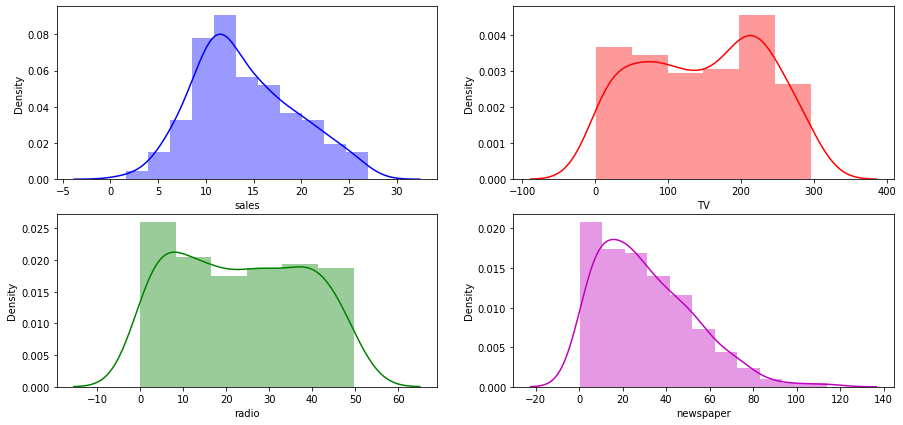

In [10]:
f,axes=plt.subplots(2,2,figsize=(15,7))


# sns.despine(left=True)

sns.distplot(data.sales, color="b", ax=axes[0, 0])

sns.distplot(data.TV, color="r", ax=axes[0, 1])

sns.distplot(data.radio, color="g", ax=axes[1, 0])

sns.distplot(data.newspaper, color="m", ax=axes[1, 1])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


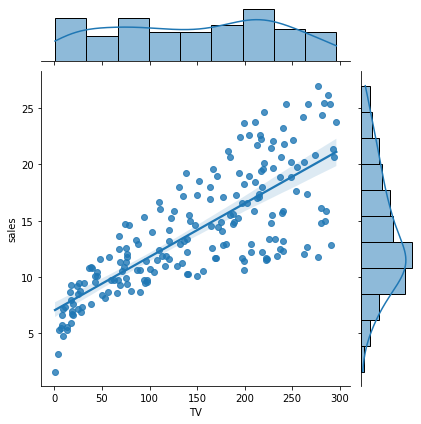

In [11]:
j1=sns.jointplot("TV","sales",data=data,kind='reg')

In [12]:
data[["TV","sales"]].corr()

,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


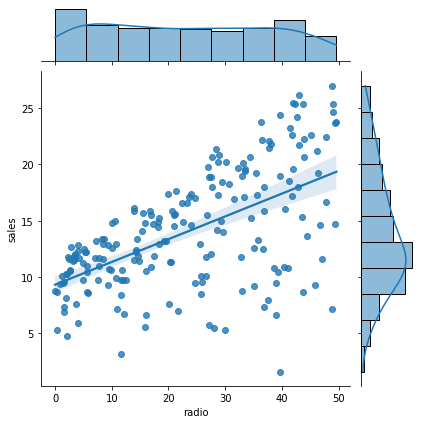

In [13]:
j2=sns.jointplot("radio","sales",data=data,kind='reg')

In [14]:
data[["radio","sales"]].corr()

,radio,sales
radio,1.000000,0.576223
sales,0.576223,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


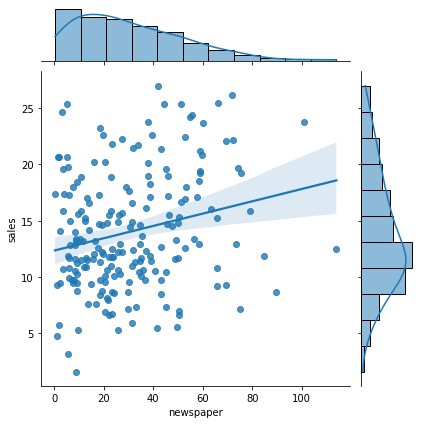

In [15]:
j3=sns.jointplot("newspaper","sales",data=data,kind="reg")

In [16]:
data[["newspaper","sales"]].corr()

,newspaper,sales
newspaper,1.000000,0.228299
sales,0.228299,1.000000


among these newspaper have no linear correlation

correlation can be -1 to +1 nearest to +1 is a strong relation or else weak relation

tv have highest correlation

Visualising Pairwise correlation

In [17]:
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


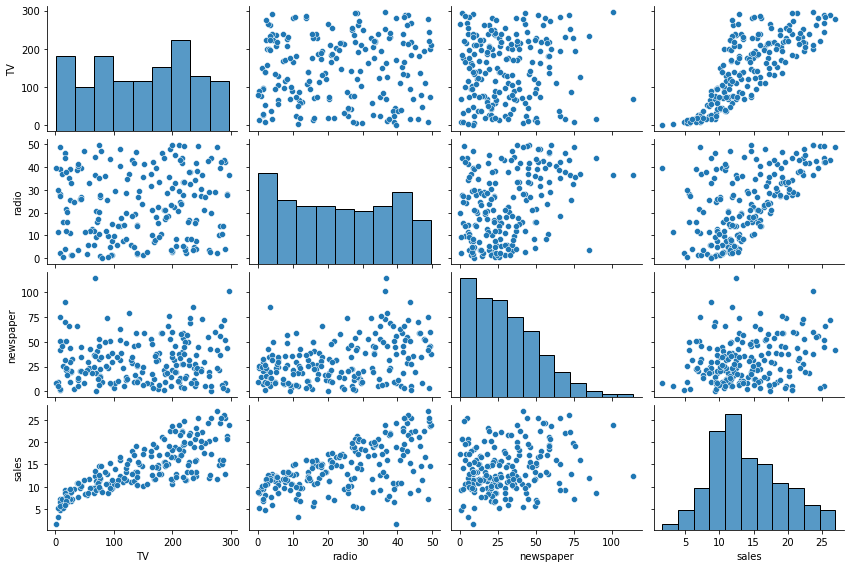

In [18]:
sns.pairplot(data, height = 2, aspect = 1.5)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


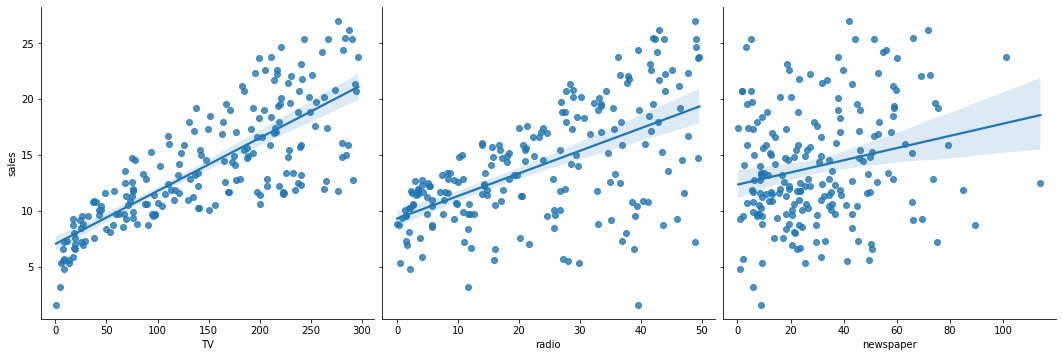

In [19]:
sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars="sales",size=5, aspect=1, kind='reg')

Strong relationship between TV ads and sales

Weak relationship between Radio ads and sales


Very weak to no relationship between Newspaper ads and sales

In [20]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

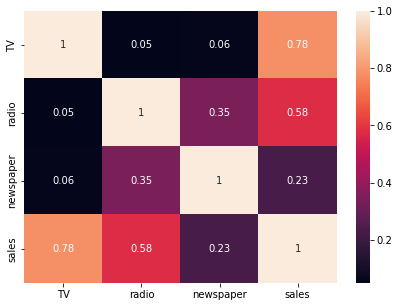

In [24]:
plt.figure(figsize=(7,5))
sns.heatmap(round(data.corr(),2),annot=True)
plt.show

high correlation between tv and sales

less correlation between radio and sales

no correlation between newspaper and sales

4. Training and Testing the Model


In [44]:
features=["TV" ,"radio", "newspaper"]
target=["sales"]

In [26]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [27]:
data[features]

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [28]:
data[target]

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[features],data[target],test_size=0.05)


In [45]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.05, random_state=5000)

In [48]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (190, 3)
y_train shape:  (190, 1)

Test cases as below
X_test shape:  (10, 3)
y_test shape:  (10, 1)


In [37]:
X_train.head()

,TV,radio,newspaper
78,120.5,28.5,14.2
28,240.1,16.7,22.9
132,265.2,2.9,43.0
150,44.7,25.8,20.6
136,48.3,47.0,8.5


4.2 Linear regression in scikit-learn

to build a machine learning algorithm

1.load the ml
2.fit the model to train data
3.predict on test data
4.evaluate rmse and r square value

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) 


LinearRegression()

intercept

coeff

In [55]:
print('intercept:',regressor.intercept_)

intercept: [3.01747261]


In [56]:
print('coefficient:',regressor.coef_)

coefficient: [[ 0.04606617  0.18521379 -0.00077499]]


In [59]:
(regressor.coef_).T

array([[ 0.04606617],
       [ 0.18521379],
       [-0.00077499]])

In [60]:
pd.DataFrame((regressor.coef_).T,index=X_train.columns,columns=['coefficient']).sort_values('coefficient',ascending='False')

,coefficient
newspaper,-0.000775
TV,0.046066
radio,0.185214


y=0.0460 * TV + 0.185 * radio - 0.0007 * newspaper + 3.017

In [63]:
y_pred_train=regressor.predict(X_train)
y_pred_train

array([[15.22655642],
       [12.22288036],
       [ 7.74967489],
       [13.76871713],
       [17.16169634],
       [14.42959059],
       [20.4408894 ],
       [10.35580601],
       [14.38282241],
       [16.89076274],
       [ 8.79683737],
       [10.56377943],
       [ 8.90017065],
       [ 8.20690619],
       [ 8.25817564],
       [15.29552605],
       [15.58769765],
       [10.37744267],
       [10.69952765],
       [ 7.11793138],
       [16.17160528],
       [15.01732702],
       [14.21482622],
       [ 4.54469743],
       [12.31136687],
       [20.79059748],
       [ 9.41777817],
       [16.48005282],
       [18.23237726],
       [11.81572699],
       [ 8.91096872],
       [15.56934728],
       [23.26190796],
       [20.47831879],
       [ 9.81203699],
       [11.41114807],
       [ 6.85729457],
       [ 8.52617847],
       [13.88216254],
       [ 9.20154492],
       [16.88892233],
       [12.83492443],
       [21.17180935],
       [ 5.83585525],
       [10.14012995],
       [18

In [64]:
y_pred_test=regressor.predict(X_test)
y_pred_test

array([[10.70655771],
       [15.26111506],
       [11.13488512],
       [14.79491865],
       [ 5.35040642],
       [11.61330052],
       [17.39409944],
       [12.76884068],
       [15.76140371],
       [15.57275941]])

We need an evaluation metric in order to compare our predictions with the actual values.

5. Model evaluation

Mean Absolute Error
Mean Squared Error
Root Mean Squared Error

In [68]:
from sklearn import metrics

In [69]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [70]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 1.2437211891758508
MAE for test set is 1.306191544771307


In [71]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [72]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 2.7839981138894845
MSE for test set is 2.900244936011182


In [73]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [74]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.6685317239685569
RMSE for test set is 1.7030105507633186


In [77]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
RMSE_test

r2_test = metrics.r2_score(y_test, y_pred_test)
r2_test

0.7566581977437254